Epoch 1/500 completed
Epoch 2/500 completed
Epoch 3/500 completed
Epoch 4/500 completed
Epoch 5/500 completed
Epoch 6/500 completed
Epoch 7/500 completed
Epoch 8/500 completed
Epoch 9/500 completed
Epoch 10/500 completed
Epoch 11/500 completed
Epoch 12/500 completed
Epoch 13/500 completed
Epoch 14/500 completed
Epoch 15/500 completed
Epoch 16/500 completed
Epoch 17/500 completed
Epoch 18/500 completed
Epoch 19/500 completed
Epoch 20/500 completed
Epoch 21/500 completed
Epoch 22/500 completed
Epoch 23/500 completed
Epoch 24/500 completed
Epoch 25/500 completed
Epoch 26/500 completed
Epoch 27/500 completed
Epoch 28/500 completed
Epoch 29/500 completed
Epoch 30/500 completed
Epoch 31/500 completed
Epoch 32/500 completed
Epoch 33/500 completed
Epoch 34/500 completed
Epoch 35/500 completed
Epoch 36/500 completed
Epoch 37/500 completed
Epoch 38/500 completed
Epoch 39/500 completed
Epoch 40/500 completed
Epoch 41/500 completed
Epoch 42/500 completed
Epoch 43/500 completed
Epoch 44/500 complet

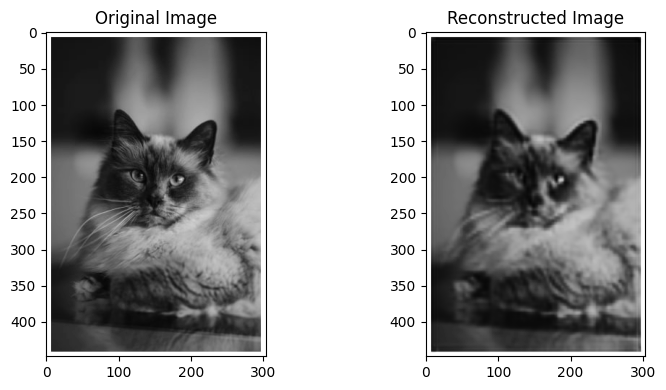

Compression Ratio: 1.53


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float, img_as_ubyte
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Dense
from keras.models import Model
from skimage.transform import resize
from scipy.linalg import svd


image_path = "pca.jpg"
original_image = io.imread(image_path)

if original_image.shape[-1] == 3:
    original_image = color.rgb2gray(original_image)

original_image = img_as_float(original_image)

crop_height = (original_image.shape[0] // 4) * 4
crop_width = (original_image.shape[1] // 4) * 4
original_image = original_image[:crop_height, :crop_width]

input_img = Input(shape=(original_image.shape[0], original_image.shape[1], 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

num_epochs = 500
for epoch in range(1, num_epochs + 1):
    autoencoder.fit(original_image.reshape(1, *original_image.shape, 1),
                    original_image.reshape(1, *original_image.shape, 1),
                    epochs=1,
                    batch_size=1,
                    verbose=0)
    print(f"Epoch {epoch}/{num_epochs} completed")

compressed_image = autoencoder.predict(original_image.reshape(1, *original_image.shape, 1))
compressed_image = compressed_image.squeeze()

compressed_image = resize(compressed_image, (crop_height, crop_width), mode='constant')

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(compressed_image, cmap="gray")

plt.tight_layout()
plt.show()

original_file_size = img_as_ubyte(original_image).nbytes
compressed_file_size = img_as_ubyte(compressed_image).nbytes

compression_ratio = original_file_size / 88976

print(f"Compression Ratio: {compression_ratio:.2f}")


In [4]:
original_image = io.imread(image_path)

if original_image.shape[-1] == 3:
    original_image = color.rgb2gray(original_image)

original_image = img_as_float(original_image)

crop_height = (original_image.shape[0] // 4) * 4
crop_width = (original_image.shape[1] // 4) * 4
original_image = original_image[:crop_height, :crop_width]

U, S, Vt = svd(original_image)

k = 100
compressed_U = U[:, :k]
compressed_S = np.diag(S[:k])
compressed_Vt = Vt[:k, :]

compressed_image_svd = np.dot(compressed_U, np.dot(compressed_S, compressed_Vt))

input_img = Input(shape=(original_image.shape[0], original_image.shape[1], 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

flatten = Flatten()(encoded)

encoded_svd = Dense(k, activation='relu')(flatten)

target_shape = (original_image.shape[0] // 4, original_image.shape[1] // 4, k)

x = Reshape(target_shape)(encoded_svd)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

ValueError: ignored

In [5]:
num_epochs = 50
for epoch in range(1, num_epochs + 1):
    autoencoder.fit(compressed_image_svd.reshape(1, *compressed_image_svd.shape, 1),
                    compressed_image_svd.reshape(1, *compressed_image_svd.shape, 1),
                    epochs=1,
                    batch_size=1,
                    verbose=0)
    print(f"Epoch {epoch}/{num_epochs} completed")

Epoch 1/50 completed
Epoch 2/50 completed
Epoch 3/50 completed
Epoch 4/50 completed
Epoch 5/50 completed
Epoch 6/50 completed


KeyboardInterrupt: ignored

In [ ]:
compressed_image_autoencoder = autoencoder.predict(compressed_image_svd.reshape(1, *compressed_image_svd.shape, 1))
compressed_image_autoencoder = compressed_image_autoencoder.squeeze()

compressed_image_autoencoder = resize(compressed_image_autoencoder, (crop_height, crop_width), mode='constant')

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Reconstructed Image (SVD)")
plt.imshow(compressed_image_svd, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Reconstructed Image (CNN Autoencoder)")
plt.imshow(compressed_image_autoencoder, cmap="gray")

plt.tight_layout()
plt.show()
